In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from mtcnn.mtcnn import MTCNN
import os
from sklearn.preprocessing import LabelEncoder
import pickle
import collections

detector = MTCNN()

Using TensorFlow backend.


In [2]:
def image_raw_filter(folder_image_raw):
    """Bộ lọc ảnh raw, các ảnh không có mặt người hoặc có nhiều hơn 1 mặt, file gif, file lỗi sẽ bị xoá """
    for file in os.listdir(folder_image_raw):
        print("Process " + file)
        image = Image.open(folder_image_raw + file)
        image_type = image.format
        if (image_type == "JPEG"):
            image = image.convert("RGB")
            image = np.asarray(image)
            face_location = detector.detect_faces(image)
            face_number = len(face_location)
            if (face_number == 0) or (face_number > 1) :
                os.remove(folder_image_raw + file)
                print("Remove " + folder_image_raw + file )
        else:
            os.remove(folder_image_raw + file)
            print("Remove " + folder_image_raw + file )
        

In [38]:
image_raw_filter("Dataset/data_raw_new/Aino Kishi/")

Process 86h -3-.jpg
Process aino-kishi-2.jpg
Process bed4b251f63b002e737a7284beff079a.jpg
Process a80664d9547367db58f1fa368c8f7d65--nc.jpg
Process images.jpeg
Process 4071cc58a213486f8483e44ff769ddf3.JPG
Process image.jpeg
Process 2149147.jpg
Process large.jpg
Remove Dataset/data_raw_new/Aino Kishi/large.jpg
Process Aino-Kishi-3-200x300.jpg
Process gettyimages-475051816-1024x1024.jpg
Process 054104085277F6196A0A3F42D0C7AB31.jpeg
Process 1259608357-1.jpg
Process models kimono asians yukata aino kishi juicy honey 1280x1920.jpg
Process models japanese asians aino kishi juicy honey 1280x1920 wall.jpg
Process p1-6269e604.png
Remove Dataset/data_raw_new/Aino Kishi/p1-6269e604.png
Process Aino Kishi love me love my small things13.jpg
Process location-on-grey600-24dp.png
Remove Dataset/data_raw_new/Aino Kishi/location-on-grey600-24dp.png
Process 1JQeRV4K-400x400.jpg
Process E3C9xYrK0kszpCSg.jpg
Process maxresdefault.jpg
Remove Dataset/data_raw_new/Aino Kishi/maxresdefault.jpg
Process gettyimag

In [3]:
#Xoá các ảnh không có mặt, file gif và có nhiều hơn 1 mặt
PROCESS_FOLDER = "Dataset/data_raw"
for folder in os.listdir(PROCESS_FOLDER):
    print("\tProcessing in " + folder)
    image_raw_filter(PROCESS_FOLDER + folder + "/")
    print("\tProcess finish! " + folder)

In [5]:
def crop_faces(raw_folder, processed_folder, size = (224,224)):
    """ Crop face in raw folder """
    for folder in os.listdir(raw_folder):
        print("\tStart crop " + folder + " face!")
        os.mkdir(processed_folder + folder)
        for file in os.listdir(raw_folder + folder):
            print("Processing " + file)
            image = Image.open(raw_folder + folder + "/" + file)
            image = image.convert('RGB')
            image = np.asarray(image)
            #detect face
            face_image = detector.detect_faces(image)
            if len(face_image) == 0 or len(face_image) > 1: 
                print("\tCrop fail!")
            else:
                x1, y1, width, height = face_image[0]['box']
                x1, y1 = abs(x1), abs(y1)
                x2, y2 = x1 + width, y1 + height
                #crop face and resize
                face = image[y1:y2,x1:x2]
                image_face = Image.fromarray(face)
                image_face = image_face.resize(size)
                #save image
                image_face.save(processed_folder + folder + "/" + file )
        

In [6]:
# Crop faces
raw_folder = "Dataset/data_raw_new/"
processed_folder = "Dataset/data_process_new/"
crop_faces(raw_folder,processed_folder,size = (224,224))
print("Crop face finish!")

In [3]:
def read_image(data_folder,save = False):
    if os.path.exists("data_face_org.npz"):
        data = np.load("data_face_org.npz")
        data_X,data_y,class_number = data["arr_0"],data["arr_1"],data["arr_2"]
        class_number = np.asscalar(class_number)
    else:
        data_X = []
        data_y = []
        class_number = 0
        for folder in os.listdir(data_folder):
            print("\tRead image " + data_folder + folder + "/")
            class_number += 1
            for file in os.listdir(data_folder + folder):
                image = Image.open(data_folder + folder + "/" + file)
                image = image.convert("RGB")
                image = np.asarray(image)
                data_X.append(image)
                data_y.append(folder)
        data_X = np.array(data_X)
        data_y = np.array(data_y)
        #Encoder data_y save file encoder
        data_y_enc = LabelEncoder()
        data_y_enc.fit(data_y)
        data_y = data_y_enc.transform(data_y)
        print("Encode label and save!")
        pkl_filename = "data_y_enc_org.pkl"
        with open(pkl_filename, 'wb') as file:
            pickle.dump(data_y_enc, file)
    if save:
        np.savez_compressed("data_face_org.npz",data_X,data_y,class_number)
    print("Load image done!")
    return data_X, data_y,class_number

In [4]:
DATA_FOLDER = "Dataset/data_process/"
data_X,data_y,class_number = read_image(DATA_FOLDER,save = True)

	Read image Dataset/data_process/Mio Kuraki/
	Read image Dataset/data_process/Suzuka Ishikawa/
	Read image Dataset/data_process/Kana Tsuruta/
	Read image Dataset/data_process/Saki Ninomiya/
	Read image Dataset/data_process/Shizuka Nakamura/
	Read image Dataset/data_process/Sumire Matsu/
	Read image Dataset/data_process/Yuma Asami/
	Read image Dataset/data_process/Tiara Ayase/
	Read image Dataset/data_process/Rina Ishihara/
	Read image Dataset/data_process/Tomoka Sakurai/
	Read image Dataset/data_process/Tsukasa Aoi/
	Read image Dataset/data_process/Kaori Ishii/
	Read image Dataset/data_process/Kotomi Asakura/
	Read image Dataset/data_process/Ai Sayama/
	Read image Dataset/data_process/Yumi Sugimoto/
	Read image Dataset/data_process/Kaho Kasumi/
	Read image Dataset/data_process/Rina Itoh/
	Read image Dataset/data_process/Rina Rukawa/
	Read image Dataset/data_process/Ai Himeno/
	Read image Dataset/data_process/Hikaru Shiina/
	Read image Dataset/data_process/Rina Koike/
	Read image Datase

In [5]:
print(data_X.shape)
print(data_y.shape)
class_number

(3364, 224, 224, 3)
(3364,)


76

In [6]:
# Load ouput_enc từ file để hiển thị nhãn
pkl_filename = 'data_y_enc_org.pkl'
with open(pkl_filename, 'rb') as file:
    output_enc = pickle.load(file)

In [7]:
def vizual_data(data_y):
    count = collections.Counter(data_y)
    count = dict(count.items())
    count_sorted = sorted(count.items(), key=lambda x: x[1])
    idol_num_image = []
    idol_name = []
    for data in count_sorted:
        idol_name.append(data[0])
        idol_num_image.append(data[1])
    divsion = ["0-9","10-19","20-29","30-39","40-49","50-59","60-69","70-79","80-89","90-99","100-109","110-119","120-129",
              "130-139","140-149","150-159","160-169","170-179"]
    vizual_data = []
    for i in range(1,np.max(idol_num_image)//10 + 2):
        temp = 0
        for num in idol_num_image:
            if  10*(i-1)<= num < 10*i: temp +=1
        vizual_data.append(temp)
    plt.barh(divsion,vizual_data)
    plt.xlabel("Number class")
    plt.ylabel("Number Image")
    plt.title("Image per class")
    plt.show()
    idol_name = output_enc.inverse_transform(idol_name)
    print("Class has the most images: " + str(idol_name[np.argmax(idol_num_image)])+ " " + str(np.max(idol_num_image)) + " images")
    print("Class has the least images: " + str(idol_name[np.argmin(idol_num_image)])+ " " + str(np.min(idol_num_image)) + " images")
    print("Average image per class: " + str(round(np.mean(idol_num_image))) + " images")
    return idol_num_image, idol_name

In [8]:
def find_least_classes(data_y, num_class_find = 10):
    idol_num_image, idol_name = vizual_data(data_y)
    name_class_find = []
    for i in range(num_class_find):
        name_class_find.append(idol_name[i])
    return name_class_find
        

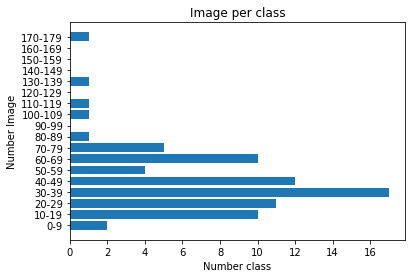

Class has the most images: Mikie Hara 174 images
Class has the least images: Tomoka Sakurai 9 images
Average image per class: 44.0 images


In [9]:
least_classes = find_least_classes(data_y, num_class_find = 10)

In [10]:
def find_deficient_classes(data_y, threshold = 50):
    idol_num_image, idol_name = vizual_data(data_y)
    name_class_find = []
    for i in range(class_number):
        if idol_num_image[i] <= threshold: 
            name_class_find.append(idol_name[i])
    return name_class_find

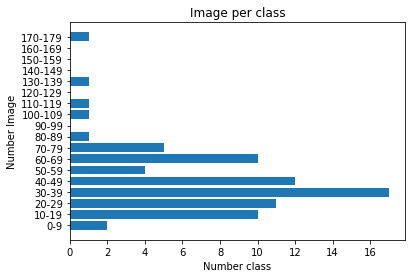

Class has the most images: Mikie Hara 174 images
Class has the least images: Tomoka Sakurai 9 images
Average image per class: 44.0 images


(['Tomoka Sakurai',
  'Ai Himeno',
  'Tiara Ayase',
  'Hinata Tachibana',
  'Rina Ishihara',
  'Sora Aoi',
  'Hina Maeda',
  'Nozomi Hazuki',
  'Sumire Matsu',
  'Hikaru Shiina',
  'Ren Azumi',
  'Yuu Shinoda',
  'Kotone Amamiya',
  'Hiyo Nishizuku',
  'Megumi Haruka',
  'Azumi Harusaki',
  'Minami Kojima',
  'Saki Ninomiya',
  'Tsubomi',
  'Minori Hatsune',
  'Tsuna Kimura',
  'Ameri Ichinose',
  'Love Satomi',
  'Hibiki Otsuki',
  'Tsukasa Aoi',
  'Maki Hojo',
  'Takizawa Laura',
  'Nana Ogura',
  'Megumi Shino',
  'Ai Sayama',
  'Rina Rukawa',
  'Kirara Asuka',
  'Rin Higurashi',
  'Noriko Ashiya',
  'Aya Kisaki',
  'Kana Yume',
  'Chika Arimura',
  'Emi Asano',
  'Kaho Kasumi',
  'Mio Kuraki',
  'Riku Minato',
  'Kokomi Naruse'],
 42)

In [12]:
deficient_classes = find_deficient_classes(data_y, 40)
deficient_classes, len(deficient_classes)

In [19]:
def read_image_processed(data_folder, ignore_folder,save = False):
    if os.path.exists("data_face_processed.npz"):
        data = np.load("data_face_processed.npz")
        data_X,data_y,class_number = data["arr_0"],data["arr_1"],data["arr_2"]
        class_number = np.asscalar(class_number)
    else:
        data_X = []
        data_y = []
        class_number = 0
        for folder in os.listdir(data_folder):
            print("\tRead image " + data_folder + folder + "/")
            if folder in ignore_folder:
                print("\t Ignore "  + folder + "/")
                continue
            class_number += 1
            for file in os.listdir(data_folder + folder):
                image = Image.open(data_folder + folder + "/" + file)
                image = image.convert("RGB")
                image = np.asarray(image)
                data_X.append(image)
                data_y.append(folder)
        data_X = np.array(data_X)
        data_y = np.array(data_y)
        #Encoder data_y save file encoder
        data_y_enc = LabelEncoder()
        data_y_enc.fit(data_y)
        data_y = data_y_enc.transform(data_y)
        print("Encode label and save!")
        pkl_filename = "data_y_enc_processed.pkl"
        with open(pkl_filename, 'wb') as file:
            pickle.dump(data_y_enc, file)
    if save:
        np.savez_compressed("data_face_processed.npz",data_X,data_y)
    print("Load image done!")
    return data_X, data_y,class_number

In [20]:
data_X, data_y,class_number = read_image_processed(DATA_FOLDER, deficient_classes, save = True)

	Read image Dataset/data_process/Mio Kuraki/
	Read image Dataset/data_process/Suzuka Ishikawa/
	Read image Dataset/data_process/Kana Tsuruta/
	Read image Dataset/data_process/Saki Ninomiya/
	 Ignore Saki Ninomiya/
	Read image Dataset/data_process/Shizuka Nakamura/
	Read image Dataset/data_process/Sumire Matsu/
	 Ignore Sumire Matsu/
	Read image Dataset/data_process/Yuma Asami/
	Read image Dataset/data_process/Tiara Ayase/
	 Ignore Tiara Ayase/
	Read image Dataset/data_process/Rina Ishihara/
	 Ignore Rina Ishihara/
	Read image Dataset/data_process/Tomoka Sakurai/
	 Ignore Tomoka Sakurai/
	Read image Dataset/data_process/Tsukasa Aoi/
	Read image Dataset/data_process/Kaori Ishii/
	Read image Dataset/data_process/Kotomi Asakura/
	Read image Dataset/data_process/Ai Sayama/
	Read image Dataset/data_process/Yumi Sugimoto/
	Read image Dataset/data_process/Kaho Kasumi/
	Read image Dataset/data_process/Rina Itoh/
	Read image Dataset/data_process/Rina Rukawa/
	Read image Dataset/data_process/Ai H

In [21]:
print(sorted(collections.Counter(data_y).items()))

[(0, 34), (1, 68), (2, 41), (3, 43), (4, 78), (5, 60), (6, 44), (7, 61), (8, 44), (9, 66), (10, 36), (11, 66), (12, 83), (13, 36), (14, 36), (15, 31), (16, 76), (17, 38), (18, 41), (19, 36), (20, 63), (21, 34), (22, 40), (23, 61), (24, 63), (25, 32), (26, 51), (27, 47), (28, 33), (29, 46), (30, 174), (31, 39), (32, 33), (33, 56), (34, 35), (35, 46), (36, 40), (37, 35), (38, 107), (39, 70), (40, 72), (41, 34), (42, 65), (43, 110), (44, 43), (45, 33), (46, 52), (47, 32), (48, 66), (49, 74), (50, 49), (51, 132), (52, 56)]


In [27]:
from sklearn.model_selection import train_test_split

X_train_org, X_test_org, y_train_org, y_test_org = train_test_split(data_X,data_y, test_size = 0.2)

In [28]:
X_train_org.shape, y_train_org.shape, X_test_org.shape, y_test_org.shape

((2352, 224, 224, 3), (2352,), (589, 224, 224, 3), (589,))

In [29]:
print(sorted(collections.Counter(y_train_org).items()))

[(0, 27), (1, 49), (2, 33), (3, 37), (4, 62), (5, 49), (6, 39), (7, 43), (8, 33), (9, 51), (10, 29), (11, 53), (12, 74), (13, 31), (14, 22), (15, 23), (16, 60), (17, 29), (18, 36), (19, 31), (20, 46), (21, 23), (22, 29), (23, 44), (24, 52), (25, 25), (26, 40), (27, 39), (28, 28), (29, 37), (30, 142), (31, 32), (32, 24), (33, 46), (34, 29), (35, 32), (36, 36), (37, 27), (38, 90), (39, 55), (40, 58), (41, 30), (42, 51), (43, 85), (44, 33), (45, 29), (46, 41), (47, 27), (48, 54), (49, 62), (50, 40), (51, 110), (52, 45)]


In [30]:
print(sorted(collections.Counter(y_test_org).items()))

[(0, 7), (1, 19), (2, 8), (3, 6), (4, 16), (5, 11), (6, 5), (7, 18), (8, 11), (9, 15), (10, 7), (11, 13), (12, 9), (13, 5), (14, 14), (15, 8), (16, 16), (17, 9), (18, 5), (19, 5), (20, 17), (21, 11), (22, 11), (23, 17), (24, 11), (25, 7), (26, 11), (27, 8), (28, 5), (29, 9), (30, 32), (31, 7), (32, 9), (33, 10), (34, 6), (35, 14), (36, 4), (37, 8), (38, 17), (39, 15), (40, 14), (41, 4), (42, 14), (43, 25), (44, 10), (45, 4), (46, 11), (47, 5), (48, 12), (49, 12), (50, 9), (51, 22), (52, 11)]


In [31]:
np.savez_compressed("data_face_train_imb.npz",X_train_org, X_test_org, y_train_org, y_test_org, class_number)

In [32]:
#Xử lý mất cân bằng dữ liệu bằng oversampling
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(random_state=0)
X_train_imb = X_train_org.reshape(X_train_org.shape[0],-1)
X_train, y_train = oversample.fit_resample(X_train_imb,y_train_org)
X_train = X_train.reshape(X_train.shape[0],224,224,3)
X_test_imb = X_test_org.reshape(X_test_org.shape[0],-1)
X_test, y_test = oversample.fit_resample(X_test_imb,y_test_org)
X_test = X_test.reshape(X_test.shape[0],224,224,3)

In [33]:
print(sorted(collections.Counter(y_train).items()))

[(0, 142), (1, 142), (2, 142), (3, 142), (4, 142), (5, 142), (6, 142), (7, 142), (8, 142), (9, 142), (10, 142), (11, 142), (12, 142), (13, 142), (14, 142), (15, 142), (16, 142), (17, 142), (18, 142), (19, 142), (20, 142), (21, 142), (22, 142), (23, 142), (24, 142), (25, 142), (26, 142), (27, 142), (28, 142), (29, 142), (30, 142), (31, 142), (32, 142), (33, 142), (34, 142), (35, 142), (36, 142), (37, 142), (38, 142), (39, 142), (40, 142), (41, 142), (42, 142), (43, 142), (44, 142), (45, 142), (46, 142), (47, 142), (48, 142), (49, 142), (50, 142), (51, 142), (52, 142)]


In [34]:
print(sorted(collections.Counter(y_test).items()))

[(0, 32), (1, 32), (2, 32), (3, 32), (4, 32), (5, 32), (6, 32), (7, 32), (8, 32), (9, 32), (10, 32), (11, 32), (12, 32), (13, 32), (14, 32), (15, 32), (16, 32), (17, 32), (18, 32), (19, 32), (20, 32), (21, 32), (22, 32), (23, 32), (24, 32), (25, 32), (26, 32), (27, 32), (28, 32), (29, 32), (30, 32), (31, 32), (32, 32), (33, 32), (34, 32), (35, 32), (36, 32), (37, 32), (38, 32), (39, 32), (40, 32), (41, 32), (42, 32), (43, 32), (44, 32), (45, 32), (46, 32), (47, 32), (48, 32), (49, 32), (50, 32), (51, 32), (52, 32)]


In [35]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7526, 224, 224, 3), (1696, 224, 224, 3), (7526,), (1696,))

In [36]:
np.savez_compressed("data_face_train.npz",X_train, X_test, y_train, y_test, class_number)